In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from kalman_filter_without_control import *

In [2]:
def get_real_position(t):
    return 1 - 0.2*t**2 + 0.3*t - 0.01*t**3

In [3]:
def get_real_velocity(t):
    return (get_real_position(t + 1e-4) - get_real_position(t - 1e-4))/2e-4

In [4]:
def get_real_acceleration(t):
    return (get_real_velocity(t + 1e-4) - get_real_velocity(t - 1e-4))/2e-4

In [5]:
def obsevation(t, cov):
    return get_real_position(t) + np.random.randn(*t.shape)*np.sqrt(cov)

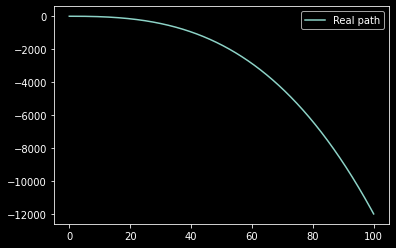

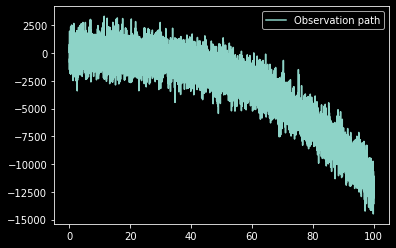

In [6]:
T = 100
t = np.arange(0,100,step=1/T)
plt.plot(t, get_real_position(t), label="Real path")
plt.legend()
plt.show()

plt.plot(t, obsevation(t, 1000**2), label="Observation path")
plt.legend()
plt.show()

In [8]:
delta_t = 1/T
initial_estimate = np.array([[0.0], [2.0], [3.0]])
initial_error_cov = np.array([
    [100, 0, 0],
    [0, 100, 0],
    [0, 0, 100]
])
observation_noise_cov = np.array([[1000**2]])
process_noise = np.array([
    [100**2, 0, 0],
    [0, 100**2, 0],
    [0, 0, 100**2]
])
transition_matrix = np.array([
        [1, delta_t, 0.5*delta_t**2],
        [0, 1, delta_t],
        [0, 0, 1]
])
observation_matrix = np.array(
        [[1, 0, 0]]
)

In [9]:
kalman_state = []
estimate_position = []
real_position = []
observation_list = []

pre_estimate = initial_estimate
pre_cov = initial_error_cov
initial_observation = obsevation(
    np.array([[1]]), 
    observation_noise_cov
)
observation_t = initial_observation
observation_list.append(observation_t[0][0])

In [10]:


for i in t:
    kalman_value = kalman_predict(
        pre_estimate,
        observation_t,
        pre_cov,
        transition_matrix,
        observation_matrix,
        process_noise,
        observation_noise_cov
    )
    kalman_state.append(kalman_value)
    pre_estimate = kalman_value["estimate"]
    pre_cov = kalman_value["cov"]
    observation_t = obsevation(
        np.array([[i+1]]), 
        observation_noise_cov
    )
    observation_list.append(observation_t[0][0])

estimate_position = [kalman_v["estimate"][0][0] for kalman_v in kalman_state]
real_position = [get_real_position(step) for step in t]

# print(len(estimate_position))
# print(len(real_position))
# print(len(t))
# print(estimate_position[0])


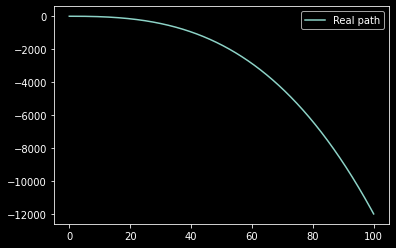

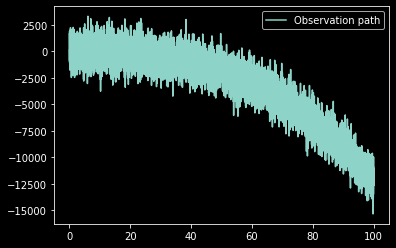

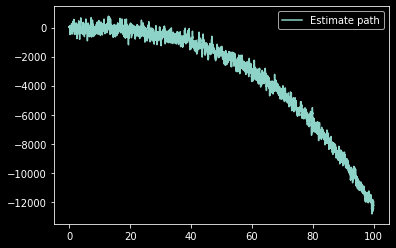

In [11]:
plt.plot(t, get_real_position(t), label="Real path")
plt.legend()
plt.show()

plt.plot(t, observation_list[0:-1], label="Observation path")
plt.legend()
plt.show()

plt.plot(t, estimate_position, label="Estimate path")
plt.legend()
plt.show()